# Brief introduction into pyaerocom 

This notebook gives a brief introduction into the main API of pyaerocom, particularly co-location of models with observations. It was written for the Feb. 2021 pyaerocom workshop, and it requires access to the PPI infrastructure of MET.

## Technical preparations and setup

Please follow the instructions in the workshop [README](https://github.com/metno/pyaerocom-meetings/tree/master/Feb2021_Workshop) regarding installation of pyaerocom and other technical requirements for the workshop.

## Important remarks

- The following instructions use a ***local installation of pyaerocom***.
- This means, that the processing may be slow if you work via VPN.
- If things are too slow, you may move the data you need locally and tell pyaerocom where to find it (how to do that is explained below).
- Or, you may install pyaerocom on lustre, or run via qlogin. Hans will give an introduction on how to do that (see [Agenda](https://docs.google.com/document/d/1iGBjMBwvkqfdboJV5r2bOKv25NgSFs5i01G6Galt2vo/edit)).

## Test pyaerocom installation and access to PPI

After installing pyaerocom, open a notebook (e.g. this one or a new one) and try importing pyaerocom (and print version):

In [1]:
import pyaerocom as pya
pya.__version__

'0.10.0'

This should be 0.10.0 (or later, e.g. 0.11.0, if everything goes well until the workshop).

#### Change verbosity

By default, pyaerocom (and potentially other libraries) prints quite some information, you have control on that via:

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
pya.change_verbosity(new_level='warning', log=pya.const.print_log) # this will limit prints, you may activate or deactivate choose from e.g. "info", "warning", "critical"

### Check local PPI access

In order to run this notebook, you need to have `/lustre/storeA` mounted on your local machine, either in root (`/`) or home (`~`). Please follow the instructions provided [here](https://github.com/metno/pyaerocom-meetings/blob/master/Feb2021_Workshop/README.md#mount-ppi-locally).

If you are in a jupyter notebook (or python script) you can check access to lustre via (after importing pyaerocom):

In [3]:
pya.const.has_access_lustre 

True

or from the command line via:

```bash 
pya --ppiaccess
```

If this returns `True` then you are all set for using pyaerocom. 

**Note**, if you mounted lustre after starting this notebook and importing pyaerocom (above), you will have to restart the notebook kernel and reimport pyaerocom for it to setup access to PPI!

### Where does pyaerocom look for data?

If PPI is mounted in one of the possible locations (root or home, see above), pyaerocom automatically registers a set of basic directories, where it searches for model and observational data. You can list all search directories via: 

In [4]:
pya.const.DATA_SEARCH_DIRS

['/lustre/storeA/project/aerocom/aerocom1/',
 '/lustre/storeA/project/aerocom/aerocom2/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/CMIP6',
 '/lustre/storeA/project/aerocom/aerocom-users-database/C3S-Aerosol',
 '/lustre/storeA/project/aerocom/aerocom-users-database/ECLIPSE',
 '/lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/ACCMIP/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP_COPERNICUS/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP_GLOBAL/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP_SVN_TEST/',
 '/lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST/',
 '/lustre/storeA/project/aerocom/aerocom2/INCA/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/HTAP-PHASE-I/',
 '/lu

If, for some reason, pyaerocom does not manage to get access to PPI this list will be likely empty. In this case you can also add directories manually. I (Jonas) for instance have some model data stored locally at:

In [5]:
add_search_dir = '/home/jonasg/MyPyaerocom/data/modeldata'

In [6]:
import os
os.listdir(add_search_dir)

['GISS-OMA-met2010_test-aod',
 'OsloCTM3v1.01-met2010_AP3-CTRL',
 'NorESM2-AODSSMEDIAN-met2010_AP3-CTRL',
 'AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL',
 'AEROCOM-MEAN-2x3-GLISSETAL2020-1_AP3-CTRL']

In [7]:
try:
    pya.const.add_data_search_dir(add_search_dir) # this will raise a FileNotFoundError, if the input directory does not exist, therefore I add the try / except block, so if someone else runs it it just prints a warning
except FileNotFoundError as e:
    print(f'Failed to add {add_search_dir}. Reason: {e}')

Check if it worked (list last entry in search dir list):

In [8]:
pya.const.DATA_SEARCH_DIRS[-1]

'/home/jonasg/MyPyaerocom/data/modeldata'

## Getting started with the analysis

### Minimal API

![](suppl/pyaerocom_basic_flowchart.png)

This is a veeery brief introduction into the main API. Please checkout the [tutorials](https://github.com/metno/pyaerocom-tutorials) for more examples (particularly the notebook ***getting_started_analysis.ipynb***). The tutorials are based on a small example / test dataset and can be run interactively using Binder, via this link:

https://mybinder.org/v2/gh/metno/pyaerocom-tutorials/master

It may take a while for Binder to setup the analysis environment.

### Finding model and observation data

The most important command for searching both model and obsdata is:

In [9]:
pya.browse_database

<function pyaerocom.io.utils.browse_database(model_or_obs, verbose=False)>

The search allows to use wildcard patterns and works on directory names. E.g. to search for recent NorESM data, you can call:

In [10]:
pya.browse_database('*NorESM2*')

Found more than 20 matches for input pattern *NorESM2*:

Matches: ['NorESM2-LM_historical', 'eclipse.NorESM2.Test92f19_f19_0003_0004', 'eclipse.NorESM2.Test111f19_f19_0002_0004', 'eclipse.NorESM2.Test120f19_f19_0002_0004', 'eclipse.NorESM2.Test112f19_f19_0002_0004', 'eclipse.NorESM2.Test116f19_f19_0002_0004', 'eclipse.NorESM2.Test121f19_f19_0002_0004', 'eclipse.NorESM2.Test91f19_f19_0003_0004', 'eclipse.NorESM2.Test114f19_f19_0002_0004', 'eclipse.NorESM2.Test111f19_f19_0003_0008', 'eclipse.NorESM2.Test113f19_f19_0002_0004', 'eclipse.NorESM2.Test122f19_f19_0002_0004', 'NorESM2-NHIST_02_f19_tn14_201908130', 'NorESM2-NFHISTnorpibc_f19_20191208', 'NorESM2-NHIST_f19_tn14_20190710', 'NorESM2-met2010_u3p41_AP3-CTRL', 'NorESM2_NHISTfrc2_f09_tn14_20191025', 'NorESM2-NHIST_f19_tn14_20190710_2005-2014', 'NorESM2_NFHISTnorpddmsbc_dme_energy_f19_mg17_20191025', 'NorESM2-CPL-NEWTEST_HIST', 'NorESM2-NHIST_03_f19_tn14_201908130', 'NorESM2_NFHISTnorpddmsbc_zm_conv_f19_mg17_20191025', 'NorESM2_NFHISTnor

The search can also be done from the command line:

```bash
pya -b *NorESM2*
```

### Searching and reading model data

Search for AeroCom median data from [Gliß et al., 2021](https://acp.copernicus.org/articles/21/87/2021/acp-21-87-2021.html).

In [11]:
pya.browse_database('*AEROCOM*MEDIAN*GLISS*')


Pyaerocom ReadGridded
---------------------
Data ID: AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL/renamed
Available experiments: ['AP3']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs440aer', 'abs440aerdiv', 'abs440aerq1', 'abs440aerq3', 'abs550aer', 'abs550aerdiv', 'abs550aerq1', 'abs550aerq3', 'abs550bc', 'abs550bcdiv', 'abs550bcq1', 'abs550bcq3', 'abs550dust', 'abs550dustdiv', 'abs550dustq1', 'abs550dustq3', 'abs550oa', 'abs550oadiv', 'abs550oaq1', 'abs550oaq3', 'abs870aer', 'abs870aerdiv', 'abs870aerq1', 'abs870aerq3', 'ac550aer', 'ac550aerdiv', 'ac550aerq1', 'ac550aerq3', 'ang4487aer', 'ang4487aerdiv', 'ang4487aerq1', 'ang4487aerq3', 'drybc', 'drybcdiv', 'drybcq1', 'drybcq3', 'drydust', 'drydustdiv', 'drydustq1', 'drydustq3', 'dryno3', 'dryno3div', 'dryno3q1', 'dryno3q3', 'dryoa', 'dryoadiv', 'dryoaq1', 'dryo

['AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL',
 'AEROCOM-MEDIAN-1x1-GLISSETAL2020-1_AP3-CTRL',
 'AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL']

Initiate gridded model reader for the 2x3 data, which can be done via the corresponding data ID (see output above):

In [12]:
modelreader = pya.io.ReadGridded(data_id='AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL')
modelreader


Pyaerocom ReadGridded
---------------------
Data ID: AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL/renamed
Available experiments: ['AP3']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs440aer', 'abs440aerdiv', 'abs440aerq1', 'abs440aerq3', 'abs550aer', 'abs550aerdiv', 'abs550aerq1', 'abs550aerq3', 'abs550bc', 'abs550bcdiv', 'abs550bcq1', 'abs550bcq3', 'abs550dust', 'abs550dustdiv', 'abs550dustq1', 'abs550dustq3', 'abs550oa', 'abs550oadiv', 'abs550oaq1', 'abs550oaq3', 'abs870aer', 'abs870aerdiv', 'abs870aerq1', 'abs870aerq3', 'ac550aer', 'ac550aerdiv', 'ac550aerq1', 'ac550aerq3', 'ang4487aer', 'ang4487aerdiv', 'ang4487aerq1', 'ang4487aerq3', 'drybc', 'drybcdiv', 'drybcq1', 'drybcq3', 'drydust', 'drydustdiv', 'drydustq1', 'drydustq3', 'dryno3', 'dryno3div', 'dryno3q1', 'dryno3q3', 'dryoa', 'dryoadiv', 'dryoaq1', 'dryo

#### Read model AOD at 550nm

In [13]:
modelaod = modelreader.read_var('od550aer', start=2010)
modelaod

pyaerocom.GriddedData
Grid data: <iris 'Cube' of od550aer / (1) (time: 12; latitude: 90; longitude: 120)>

Resample to yearly and plot:

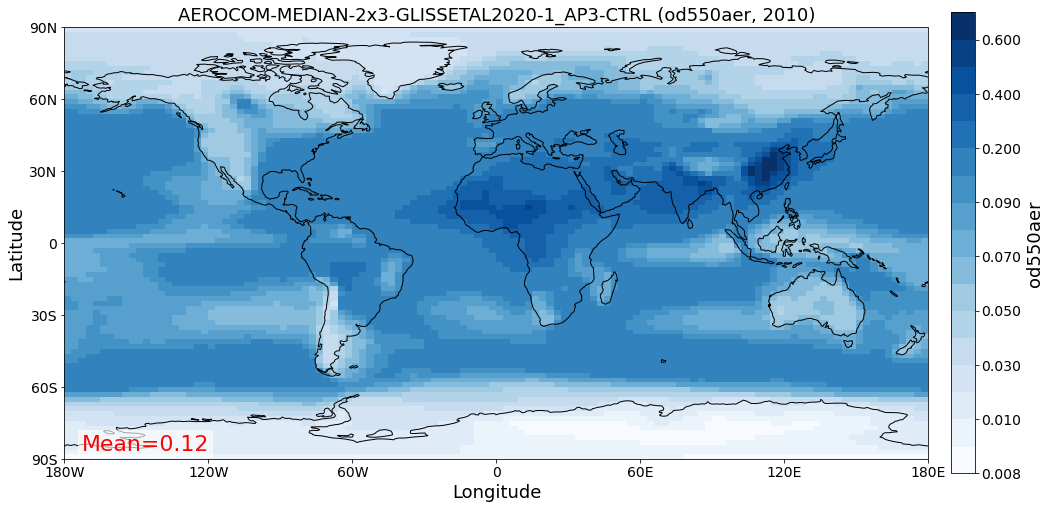

In [14]:
modelaod.resample_time('yearly').quickplot_map();

Note that the yearly resampling was only applied to the plot data and modelaod is still in monthly resolution...

### Search and read observation data

Search for AERONET level 2, daily AOD sun photometer data. Again, use:

In [15]:
pya.browse_database('*Aeronet*Lev2*daily*')


Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSDAV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0.SDA.daily/renamed
Supported variables: ['date', 'time', 'julien_day', 'od500aer', 'od500lt1aer', 'od500gt1aer', '_eta500lt1', '_aod500aer_fiterr', '_aod500lt1aer_rmse', '_aod500gt1aer_rmse', '_eta500lt1_rmse', '_ang50aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer_input', 'od490aer', 'od443aer', 'od440aer', 'od412aer', 'od380aer', 'ang4487aer', 'od550aer', 'od550gt1aer', 'od550lt1aer']
Last revision: 20180519

Dataset name: AeronetInvV2Lev

['AeronetSunV2Lev2.daily',
 'AeronetSDAV2Lev2.daily',
 'AeronetInvV2Lev2.daily',
 'AeronetSunV3Lev2.daily',
 'AeronetSDAV3Lev2.daily',
 'AeronetInvV3Lev2.daily']

#### Reading ungridded observation data

Instantiate ungridded reader with **Data ID (see Dataset name in output above)** for Aeronet Sun, version 3, level 2 daily dataset:

In [16]:
obsreader = pya.io.ReadUngridded('AeronetSunV3Lev2.daily')

The following line will read AOD at 550nm (`od550aer`) and Angstrom Exponent (`ang4487aer`) observations from AERONET level 2 daily dataset. If you run this for the first time, this may take a while, especially if you work via VPN. Enough time to grab a coffee (if you run it for the second time, reading will be fast, as it caches the obsdata locally)...

In [17]:
obsdata = obsreader.read(vars_to_retrieve=['od550aer', 'ang4487aer'])

#### Side note: Obsdata caching ???

Since reading of observation data often takes time, pyaerocom has a caching strategy, that stores pickled versions of `UngriddedData` objects locally, to accelerate reuse of the data. Cached data objects are stored unde `~/MyPyaerocom/_cache/${USER}`:

In [18]:
pya.const.CACHEDIR

'/home/jonasg/MyPyaerocom/_cache/jonasg'

You might set this to a different location. To activate / deactivate obsdata caching you modify the following attr.:

In [19]:
pya.const.CACHING # = False

True

Plot all site locations from the Aeronet data:

In [20]:
ax = obsdata.plot_station_coordinates(markersize=80)
# overlay sites that have AOD in 2010 in green
ax = obsdata.plot_station_coordinates(var_name='od550aer', start=2010, color='lime', markersize=50, ax=ax)
# overlay sites that have AE data in 2010 in blue
ax = obsdata.plot_station_coordinates(var_name='ang4487aer', start=2010, color='blue', markersize=10, ax=ax)

KeyError: 'variables'

## Co-location of model data with observations 

### Co-locate AeroCom median AOD with AERONET data

The main function performing co-location of gridded model data (`GriddedData`) with ungridded observations (`UngriddedData`) is [pya.colocation.colocate_gridded_ungridded](https://pyaerocom.readthedocs.io/en/latest/api.html#pyaerocom.colocation.colocate_gridded_ungridded). 

In the following we perform co-location of the model AOD from AeroCom median (loaded above) with Aeronet AOD (former section) illustrating some of the options that can be specified in the colocation routine. The most minimal call of the colocation routine is (it will determine and co-location frequency automatically based on the model data):

In [ ]:
coldata = pya.colocation.colocate_gridded_ungridded(modelaod, obsdata)
coldata

Make a scatter plot with relevant statistics from the colocated data object:

In [ ]:
coldata.plot_scatter(loglog=True)

You can also plot biasmaps (NMB) from a colocated data object, using the following function:

In [ ]:
pya.plot.mapping.plot_nmb_map_colocateddata(coldata);

Which should be similar to what is shown [here](https://aerocom-evaluation.met.no/main.php?project=aerocom&exp=glissetal-2020&mod=AEROCOM-MEDIAN#).

#### A word on temporal resampling

You can see in the scatter plot, that the co-located data is made of monthly averages, however, the obsdata is originally in daily resolution. This is handled automatically by pyaerocom and **in this context is is important to mention, that, by default, pyaerocom will resample time using a ca 25% coverage constraint**, and using a hierachical scheme (i.e. stepwise resampling). This information can be accessed via:

In [ ]:
pya.const.OBS_MIN_NUM_RESAMPLE

This means if, e.g. an observation is supposed to be resampled from hourly to monthly, it has to have at least:

- 6 hourly values to get a daily averages
- 7 daily avearges to get a monthly average

To turn off temporal resampling, you can run the co-location routine like this:

In [ ]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, apply_time_resampling_constraints=False).plot_scatter(loglog=True)

You can also provide a custom resampling scheme, e.g. require ca 75% daily coverage to get a monthly mean:

In [ ]:
MY_MIN_NUM_OBS = {
    'yearly': {'monthly': 3},
    'monthly': {'daily': 22}
    }

The following co-locates in yearly resolution using the above defined resampling scheme (i.e. for each site, at least 22 daily obsvalues in each month and at least 3 of such months):

In [ ]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, ts_type='yearly', min_num_obs=MY_MIN_NUM_OBS).plot_scatter(loglog=True)

#### Applying other resampling aggregators than mean

Similar to `min_num_obs`, `resample_how` can be specified to define what aggregator should be used for resampling, e.g. median:

In [ ]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, start=2010, ts_type='monthly', resample_how='median').plot_scatter(loglog=True)

As for `min_num_obs` the value can also be defined stepwise:

In [ ]:
MY_RESAMPLE_HOW =  {
    'yearly': {'monthly': 'mean'},
    'monthly': {'daily': 'median'}
    }

And then, e.g.:

In [ ]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, ts_type='yearly', min_num_obs=MY_MIN_NUM_OBS, resample_how=MY_RESAMPLE_HOW).plot_scatter(loglog=True)

### Filtering of ungridded observations before colocation

Sometimes we only want to perform the analysis in a certain region. The `UngriddedData` object can be filtered by any metadata that is provided for the associated data / network. Meta-data is stored independently of the actual variable values in the `UngriddedData` objects, in individual metadata dictionaries, which can be accessed via `metadata` attr, e.g. to get the first metadata block:

In [ ]:
obsdata.metadata[0]

For Aeronet, the available metadata is rather minimal (e.g. no site classification information). To filter the data by metadata values, you can do something like:

In [ ]:
obssubset = obsdata.apply_filters(longitude=(-15, 25), latitude=(30, 90), station_name='B*')
obssubset

This subset contains only data from sites in the specified lat lon range and starting with B.

In [ ]:
obssubset.plot_station_coordinates()

And co-locate and plot:

In [ ]:
pya.colocation.colocate_gridded_ungridded(modelaod, obssubset).plot_scatter(loglog=True)

### Constrained model reading

A recently introduced feature in `ReadGridded` can be used to define and apply constraints when reading model data. The following example shows how to read AOD only where the Angstrom Exponent is within a certain value range, which is associated with coarse aerosol. We define 2 constraints as dictionaries and put them in a list, which will then be added to the reading instruction below:

In [ ]:
ignore_where = [
    {# ignore all grid points where AE is smaller than 0
        'var_name' : 'ang4487aer',
        'operator' : '<',
        'filter_val' : 0
     },
    {# ignore all grid points where AE is larger than 0.5
        'var_name' : 'ang4487aer',
        'operator' : '>',
        'filter_val' : 0.5
     }
]

In [ ]:
model_aodc = modelreader.read_var('od550aer', constraints=ignore_where)
model_aodc

In [ ]:
model_aodc.resample_time('yearly', apply_constraints=False).quickplot_map();

Colocate this and check statistics:

In [ ]:
coldata = pya.colocation.colocate_gridded_ungridded(model_aodc, obsdata)

In [ ]:
coldata.plot_scatter(loglog=True);

## Summing it up 

The selected examples hopefully helped you to understand the basic API of pyaerocom for reading of data and co-location. Everything we have illustrated here at the lower level can be specified in a configuration class `AerocomEvaluation` which is used for running the high-level web evaluation tools. For an introduction into the `AerocomEvaluation` class, see the tutorial notebook [example_webeval.ipynb](example_webeval.ipynb).